# 16

In [44]:
import numpy as np
import pandas as pd
from scipy.cluster.vq import kmeans,vq
import shutil
import os
import os.path
from sklearn.metrics import accuracy_score
from os import path
import sys
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import BaggingClassifier
import cv2
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import idx2numpy
from sklearn.model_selection import GridSearchCV
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from os import listdir
from matplotlib import image
from natsort import natsorted
import pandas as pd 

In [259]:
# def readImages(direc,dest):
#     loaded_images = []
#     for filename in natsorted(listdir(direc)):
#         image = cv2.imread(direc+filename)
#         cv2.imwrite(dest+filename,image)

In [ ]:
#readImages('./bonus-sml-2020/SML_Train/','./bonus-sml-2020/SML_Train_Temp/')

In [114]:
labels = pd.read_csv("./bonus-sml-2020/SML_Train.csv")

# Create `train_sep` directory
train_dir = './bonus-sml-2020/SML_Train/'
train_sep_dir = './bonus-sml-2020/train_sep/'
if not os.path.exists(train_sep_dir):
    os.mkdir(train_sep_dir)

for filename, class_name in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(train_sep_dir + str(class_name)):
        os.mkdir(train_sep_dir + str(class_name))
    src_path = train_dir + filename
    dst_path = train_sep_dir + str(class_name) + '/' + filename
    try:
        shutil.copy(src_path, dst_path)
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

In [212]:
train_path='./bonus-sml-2020/train_sep/'
training_names=os.listdir(train_path)
#print(training_names)
image_paths=[]
image_classes=[]

In [213]:
def imglist(path):
    return[os.path.join(path,f) for f in os.listdir(path)]

In [214]:
for training_name in training_names:
    dir=os.path.join(train_path,training_name)
    #print(dir)
    class_path=imglist(dir)
    #print(class_path)
    image_paths+=class_path
    #print(image_path)
    image_classes+=[training_name]*len(class_path)

In [215]:
des_list=[]
brisk=cv2.BRISK_create(30)
#sift = cv2.xfeatures2d.SIFT_create()

In [216]:
#image_classes_temp=[]

In [217]:
for image_path in image_paths:
    im=cv2.imread(image_path)
    kpts,des=brisk.detectAndCompute(im,None)
    if des is None:
        no_kp = np.zeros((1, brisk.descriptorSize()), np.float32)
        des_list.append((image_path,no_kp))
    else:   
        des_list.append((image_path,des))

In [218]:
# for i in range(len(image_paths)):
#     image_path=image_paths[i]
#     im=cv2.imread(image_path)
#     kpts,des=brisk.detectAndCompute(im,None)
#     if des is not None:
#     #kpts,des=sift.detectAndCompute(im,None)
#         des_list.append((image_path,des))
#         image_classes_temp.append(image_classes[i])

In [219]:
print(len(des_list))
print(len(image_classes))

16000
16000


In [222]:
descriptors=des_list[0][1]

In [ ]:
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [ ]:
descriptors_float=descriptors.astype(float)

In [ ]:
from scipy.cluster.vq import kmeans,vq

In [ ]:
k=100
voc,variance=kmeans(descriptors_float,k,1)

In [ ]:
print(voc.shape)

In [ ]:
im_features=np.zeros((len(des_list),k),"float32")
for i in range(len(des_list)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [ ]:
nbr_occrrences=np.sum((im_features>0)*1,axis=0)
idf=np.array(np.log((1.0*len(image_paths)+1)/(1.0*nbr_occrrences+1)),"float32")

In [134]:
constant_filter = StandardScaler().fit(im_features)
im_features=constant_filter.transform(im_features)

In [197]:
print(im_features.shape)

(16000, 25)


In [81]:
# from sklearn.svm import LinearSVC
# clf=LinearSVC(max_iter=5000)
# clf.fit(im_features,np.array(image_classes))

/Users/komal/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=5000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [93]:
# clf=SVC(C=5, cache_size=200,class_weight='balanced', coef0=0.0,decision_function_shape='ovr',degree=3, gamma=0.005, kernel='rbf',
# max_iter=-1, probability=False,random_state=None, shrinking=True,tol=0.001, verbose=False)
# clf.fit(im_features,np.array(image_classes))

SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [139]:
# svm=SVC(C=5, cache_size=200,class_weight='balanced', coef0=0.0,decision_function_shape='ovr',degree=3, gamma=0.005, kernel='rbf',
#         max_iter=-1, probability=False,random_state=None, shrinking=True,tol=0.001, verbose=False)

In [140]:
# clf = BaggingClassifier(base_estimator=svm, n_estimators=31, random_state=42)
# clf.fit(im_features,np.array(image_classes))

BaggingClassifier(base_estimator=SVC(C=5, break_ties=False, cache_size=200,
                                     class_weight='balanced', coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma=0.005, kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=31, n_jobs=None,
                  oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

In [185]:
#readImages('./bonus-sml-2020/SML_Test/','./bonus-sml-2020/SML_Test_Temp/')

In [ ]:
pca = PCA(n_components=100, whiten=True, random_state=42,svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [5],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(im_features,np.array(image_classes))
print(grid.best_params_)

In [ ]:
test_path='./bonus-sml-2020/SML_Test/'
image_paths_test=[]

In [ ]:
for filename in natsorted(listdir(test_path)):
    image_paths_test.append(test_path+filename)

In [ ]:
print(image_paths_test[0])

In [ ]:
des_list_test=[]
brisk=cv2.BRISK_create(30)

In [ ]:
for image_path_test in image_paths_test:
    im=cv2.imread(image_path_test)
    plt.imshow(im)
    kpts,des=brisk.detectAndCompute(im,None)
    if des is None:
        no_kp = np.zeros((1, brisk.descriptorSize()), np.float32)
        des_list_test.append((image_path_test,no_kp))
    else:   
        des_list_test.append((image_path_test,des))

None


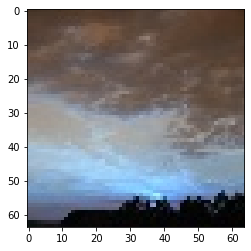

In [52]:
# def gen_sift_features(gray_img):
#     #sift = cv2.xfeatures2d.SIFT_create()
#     # kp is the keypoints
#     #
#     # desc is the SIFT descriptors, they're 128-dimensional vectors
#     # that we can use for our final features
#     kp,des=brisk.detectAndCompute(im,None)
#     print(des)
#     return kp, des

# def show_sift_features(gray_img, color_img, kp):
#     return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

# # generate SIFT keypoints and descriptors
# octo_front_kp, octo_front_desc = gen_sift_features(im)
# #octo_offset_kp, octo_offset_desc = gen_sift_features(octo_offset_gray)

# #print 'Here are what our SIFT features look like for the front-view octopus image:'
# show_sift_features(im, im, octo_front_kp)

(64, 64, 3)


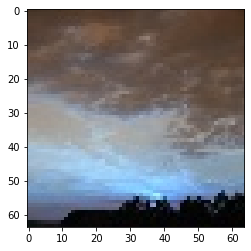

In [50]:
# im=cv2.imread('./bonus-sml-2020/SML_Test/Test_128.jpg')
# plt.imshow(im)
# print(im.shape)

In [ ]:
print(len(des_list_test))

In [204]:
des_list_test[11]

('./bonus-sml-2020/SML_Test/Test_11.jpg',
 array([[223, 255, 239, ..., 249, 177, 179],
        [107, 245, 191, ...,  77,  29,  24],
        [190, 252, 233, ...,   0, 241,  32],
        ...,
        [244, 255, 231, ...,   0,  16, 208],
        [  4, 122, 223, ...,   0,   0, 144],
        [127, 252, 235, ...,   0,  64, 192]], dtype=uint8))

In [ ]:
descriptors_test=des_list_test[0][1]

In [ ]:
for image_path_test,descriptor in des_list_test[1:]:
    descriptors_test=np.vstack((descriptors_test,descriptor))

In [ ]:
test_features=np.zeros((len(des_list_test),k),"float32")
for i in range(len(des_list_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [ ]:
nbr_occrrences_test=np.sum((test_features>0)*1,axis=0)
idf_test=np.array(np.log((1.0*len(image_paths_test)+1)/(1.0*nbr_occrrences_test+1)),"float32")

In [ ]:
test_features=constant_filter.transform(test_features)

In [175]:
print(clf)

BaggingClassifier(base_estimator=SVC(C=5, break_ties=False, cache_size=200,
                                     class_weight='balanced', coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma=0.005, kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=31, n_jobs=None,
                  oob_score=False, random_state=42, verbose=0,
                  warm_start=False)


In [157]:
y_test = clf.predict(test_features)


SyntaxError: invalid syntax (<ipython-input-157-e885b691f64a>, line 2)

In [209]:
model = grid.best_estimator_
y_test = model.predict(test_features)
print(y_test[:100])

['18' '23' '5' '6' '6' '1' '22' '8' '10' '11' '15' '11' '10' '1' '19' '16'
 '4' '3' '19' '1' '8' '1' '11' '23' '10' '4' '11' '21' '17' '11' '0' '17'
 '8' '17' '15' '10' '16' '3' '10' '9' '3' '2' '6' '13' '1' '1' '16' '16'
 '5' '15' '14' '16' '8' '16' '11' '8' '15' '8' '6' '2' '1' '8' '17' '20'
 '13' '10' '17' '2' '6' '6' '10' '13' '4' '10' '8' '15' '3' '7' '23' '17'
 '15' '17' '23' '19' '16' '20' '13' '20' '5' '6' '17' '17' '6' '17' '1'
 '11' '20' '4' '20' '17']


In [159]:
print(y_test[0:20])

['0' '20' '18' '2' '6' '1' '18' '8' '8' '8' '10' '8' '3' '17' '17' '0' '4'
 '18' '1' '17']


(64, 64, 3)


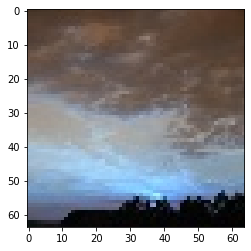

In [3]:
im=cv2.imread('./bonus-sml-2020/SML_Test/Test_128.jpg')
plt.imshow(im)
print(im.shape)

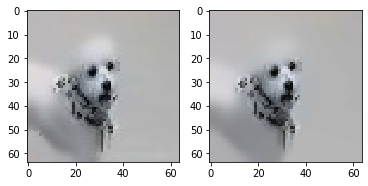

In [45]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./bonus-sml-2020/SML_Train/Train_15994.jpg')

dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)



plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

# Code

In [98]:
def readImages(direc,dest):
    for filename in natsorted(listdir(direc)):
        image = cv2.imread(direc+filename)
        #dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        cv2.imwrite(dest+filename,image)

In [99]:
readImages('./bonus-sml-2020/SML_Train/','./bonus-sml-2020/SML_Train_Temp/') #contains clean images

In [100]:
train_files=natsorted(listdir('./bonus-sml-2020/SML_Train_Temp/')) # split train data
train_labels = pd.read_csv("./bonus-sml-2020/SML_Train.csv")['category'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(train_files, train_labels, test_size=0.2)
#X_train,X_test has image file names 

def splitting(X_test,direc,dest):
    for filename in X_test:
        image = cv2.imread(direc+filename)
        cv2.imwrite(dest+filename,image)
        os.remove(direc+filename)
        
splitting(X_test,'./bonus-sml-2020/SML_Train_Temp/','./bonus-sml-2020/SML_Validation/')

In [17]:
labels = pd.read_csv("./bonus-sml-2020/SML_Train.csv") #dividing into folders for train data

# Create `train_sep` directory
train_dir = './bonus-sml-2020/SML_Train/'
train_sep_dir = './bonus-sml-2020/train_sep/'
if not os.path.exists(train_sep_dir):
    os.mkdir(train_sep_dir)

for filename,class_name in labels.values:
    if path.exists((train_dir + filename)):
        # Create subdirectory with `class_name`
        if not os.path.exists(train_sep_dir + str(class_name)):
            os.mkdir(train_sep_dir + str(class_name))
        src_path = train_dir + filename
        dst_path = train_sep_dir + str(class_name) + '/' + filename
        try:
            shutil.copy(src_path, dst_path)
        except IOError as e:
            print('Unable to copy file {} to {}'
                  .format(src_path, dst_path))
        except:
            print('When try copy file {} to {}, unexpected error: {}'
                  .format(src_path, dst_path, sys.exc_info()))
            
# all bove code were input

In [23]:
train_path='./bonus-sml-2020/train_sep/'
training_names=os.listdir(train_path)
image_paths=[]
image_classes=[]

def imglist(path):
    return[os.path.join(path,f) for f in os.listdir(path)]


for training_name in training_names:
    dir=os.path.join(train_path,training_name)
    class_path=imglist(dir)
    image_paths+=class_path #paths of all images
    image_classes+=[training_name]*len(class_path) #class of all images
# print(image_paths[9000])
# print(image_classes[9000])
    
des_list=[]
brisk=cv2.BRISK_create(30)

count=0
for image_path in image_paths:
    im=cv2.imread(image_path)
    kpts,des=brisk.detectAndCompute(im,None)
    if des is None:
        count+=1
        no_kp = np.zeros((1, brisk.descriptorSize()), np.float32)
        des_list.append((image_path,no_kp))
    else:   
        des_list.append((image_path,des))
print(count)#none decriptors

203


In [24]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [33]:
print(descriptors)

[[248. 255. 199. ... 207.  78.  12.]
 [222. 255. 231. ...   0.  64. 192.]
 [188.  88.   9. ... 176. 126.  64.]
 ...
 [255.  13.   0. ...  50. 115.  48.]
 [240. 255. 255. ...  87. 130. 231.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [35]:
print(len(des_list))

16000


In [76]:
descriptors_float=descriptors.astype(float)
k=200
voc,variance=kmeans(descriptors_float,k,1)

In [77]:
print(variance)

591.4625940196025


In [78]:
im_features=np.zeros((len(des_list),k),"float32")
for i in range(len(des_list)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [79]:
# clf = RandomForestClassifier(n_estimators=100, random_state=30)
# clf.fit(im_features, np.array(image_classes))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [85]:
# clf=SVC(C=5, cache_size=200,class_weight='balanced', coef0=0.0,decision_function_shape='ovr',degree=3, gamma=0.005, kernel='rbf',
#         max_iter=-1, probability=False,random_state=None, shrinking=True,tol=0.001, verbose=False)
# clf.fit(im_features,np.array(image_classes))

SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
pca = PCA(n_components=150, whiten=True, random_state=42,svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(im_features,np.array(image_classes))

CPU times: user 1h 28min 23s, sys: 50.1 s, total: 1h 29min 13s
Wall time: 1h 29min 40s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='randomized', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                         

In [40]:
labels = pd.read_csv("./bonus-sml-2020/SML_Train.csv") #dividing into folders for train data

# Create `train_sep` directory
train_dir = './bonus-sml-2020/SML_Validation/'
train_sep_dir = './bonus-sml-2020/validation_sep/'
if not os.path.exists(train_sep_dir):
    os.mkdir(train_sep_dir)

for filename,class_name in labels.values:
    if path.exists((train_dir + filename)):
        # Create subdirectory with `class_name`
        if not os.path.exists(train_sep_dir + str(class_name)):
            os.mkdir(train_sep_dir + str(class_name))
        src_path = train_dir + filename
        dst_path = train_sep_dir + str(class_name) + '/' + filename
        try:
            shutil.copy(src_path, dst_path)
        except IOError as e:
            print('Unable to copy file {} to {}'
                  .format(src_path, dst_path))
        except:
            print('When try copy file {} to {}, unexpected error: {}'
                  .format(src_path, dst_path, sys.exc_info()))
            
# all bove code were input

In [41]:
validation_path='./bonus-sml-2020/validation_sep/'
validation_names=os.listdir(validation_path)
validation_image_paths=[]
validation_image_classes=[]

def imglist(path):
    return[os.path.join(path,f) for f in os.listdir(path)]


for validation_name in validation_names:
    dir=os.path.join(validation_path,validation_name)
    class_path=imglist(dir)
    validation_image_paths+=class_path #paths of all images
    validation_image_classes+=[validation_name]*len(class_path) #class of all images
# print(image_paths[9000])
# print(image_classes[9000])
    
validation_des_list=[]
brisk=cv2.BRISK_create(30)

count=0
for validation_image_path in validation_image_paths:
    im=cv2.imread(validation_image_path)
    kpts,des=brisk.detectAndCompute(im,None)
    if des is None:
        count+=1
        no_kp = np.zeros((1, brisk.descriptorSize()), np.float32)
        validation_des_list.append((validation_image_path,no_kp))
    else:   
        validation_des_list.append((validation_image_path,des))
print(count)#none decriptors

159


In [42]:
validation_descriptors=validation_des_list[0][1]
for validation_image_path,validation_descriptor in validation_des_list[1:]:
    validation_descriptors=np.vstack((validation_descriptors,validation_descriptor))

In [80]:
validation_im_features=np.zeros((len(validation_des_list),k),"float32")
for i in range(len(validation_des_list)):
    words,distance=vq(validation_des_list[i][1],voc)
    for w in words:
        validation_im_features[i][w]+=1

In [91]:
model = grid.best_estimator_
validation_y_pred = model.predict(validation_im_features)
#validation_y_pred = clf.predict(validation_im_features)
accuracy_score(validation_y_pred,np.array(validation_image_classes))

0.3871875

In [55]:
readImages('./bonus-sml-2020/SML_Test/','./bonus-sml-2020/SML_Test_Temp/') #contains clean images

In [67]:
test_path='./bonus-sml-2020/SML_Test_Temp/'
test_names=os.listdir(test_path)
test_image_paths=[]

for test_name in test_names:
    test_image_paths.append(test_path+test_name) #paths of all images
print(test_image_paths[0])
test_des_list=[]
brisk=cv2.BRISK_create(30)

count=0
for test_image_path in test_image_paths:
    im=cv2.imread(test_image_path)
    kpts,des=brisk.detectAndCompute(im,None)
    if des is None:
        count+=1
        no_kp = np.zeros((1, brisk.descriptorSize()), np.float32)
        test_des_list.append((test_image_path,no_kp))
    else:   
        test_des_list.append((image_path,des))
print(count)#none decriptors

./bonus-sml-2020/SML_Test_Temp/Test_588.jpg
54


In [68]:
test_descriptors=test_des_list[0][1]
for test_image_path,test_descriptor in test_des_list[1:]:
    test_descriptors=np.vstack((test_descriptors,test_descriptor))

In [82]:
test_im_features=np.zeros((len(test_des_list),k),"float32")
for i in range(len(test_des_list)):
    words,distance=vq(test_des_list[i][1],voc)
    for w in words:
        test_im_features[i][w]+=1

In [92]:
y_pred = model.predict(test_im_features)
#y_pred = clf.predict(test_im_features)

In [93]:
def helper(direc):
    files=[]
    for filename in natsorted(listdir(direc)):
        files.append(filename)
    return files

files=helper('./bonus-sml-2020/SML_Test/')
data_res=pd.DataFrame()
data_res['id']=files
data_res['category']=y_pred
data_res.to_csv (r'sample_submission.csv', index = False, header=True)

# next

In [13]:
import numpy as np
import pandas as pd
import shutil
import os
import glob, os, errno
import sys
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import cv2
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import idx2numpy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from os import listdir
from matplotlib import image
from natsort import natsorted
import pandas as pd 
from numpy import array
from PIL import Image
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

In [2]:
train_data=pd.read_csv("./bonus-sml-2020/SML_Train.csv")

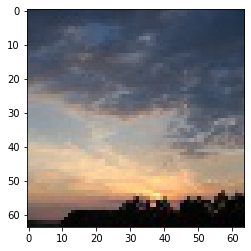

In [3]:
an_image = mpimg.imread('./bonus-sml-2020/SML_Test/Test_128.jpg')
rgb_weights = [0.2989, 0.5870, 0.1140] 
grayscale_image = np.dot(an_image[...,: 3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))
plt.imshow(an_image)

In [4]:
def grayscale(target_dir,source_dir,data):
    try:
        os.makedirs(target_dir)
    except OSError as e:
        print("Folder exsits")
    rgb_weights = [0.2989, 0.5870, 0.1140]
    for name,label in data:
        img =mpimg.imread(source_dir+name) 
        gray_image = np.dot(img[...,:3], rgb_weights)
        mpimg.imsave(target_dir+name,gray_image) 

In [5]:
def split(target_dir,source_dir,data):
    try:
        os.makedirs(target_dir)
    except OSError as e:
        print("Folder exsits")
    for name,label in data:
        img =mpimg.imread(source_dir+name) 
        mpimg.imsave(target_dir+name,img) 

In [ ]:
def imagesPreprocessing(target_dir,source_dir):
    try:
        os.makedirs(target_dir)
    except OSError as e:
        print("Folder exsits")
    for name in natsorted(listdir(source_dir)):
        image = cv2.imread(source_dir+name)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        blur = cv2.GaussianBlur(image, (5, 5), 0)
        cv2.imwrite(target_dir+name,blur)

In [ ]:
def meanfilter(target_dir,source_dir):
    figure_size = 9
    try:
        os.makedirs(target_dir)
    except OSError as e:
        print("Folder exsits")
    for name in natsorted(listdir(source_dir)):
        img = cv2.imread(source_dir+name)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        #scale_percent = 20 # percent of original size
        #width = int(img.shape[1] * scale_percent / 100)
        #height = int(img.shape[0] * scale_percent / 100)
        #dim = (width, height)
        # resize image
        #resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        #resized = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        resized = cv2.medianBlur(img, figure_size)
        cv2.imwrite(target_dir+name,resized)

In [6]:
def readImages(direc,data_train):
    loaded_images = []
    labels=[]
    for filename,label in data_train:
        img_data =image.imread(direc+ filename)
        loaded_images.append(img_data.flatten())
        labels.append(label)
    loaded_images=np.asarray(loaded_images)
    return loaded_images,labels

In [ ]:
#data[train][0][1]=label
kfold = KFold(5, True, 1)
data=train_data.to_numpy()
for train, test in kfold.split(data):
#     #print('train: %s, test: %s' % (data[train][0][1], data[test]))
#     #preorcessing steps
    
#     #grey conversion
# #     grayscale('./bonus-sml-2020/SML_Train_Temp/','./bonus-sml-2020/SML_Train/',data[train])
# #     grayscale('./bonus-sml-2020/SML_Train_Temp/','./bonus-sml-2020/SML_Train/',data[test])
    
#     #splitting to validation and train
#     split('./bonus-sml-2020/SML_Train_Temp1/','./bonus-sml-2020/SML_Train/',data[train])
#     split('./bonus-sml-2020/SML_Validation_Temp1/','./bonus-sml-2020/SML_Train/',data[test])
    
#     #data balance
#     X_train,y_train=readImages('./bonus-sml-2020/SML_Train_Temp1/',data[train])
#     X_test,y_test=readImages('./bonus-sml-2020/SML_Validation_Temp1/',data[test])
#     print("No of train images:",X_train.shape)
#     print("No of test images:",X_test.shape)
#     print("Train label:",len(y_train))
#     print("Test label:",len(y_test))
#     unique,count=np.unique(data[train][:,1],return_counts=True)
#     temp_dict={k:v for(k,v) in zip(unique,count)}
#     print(temp_dict)
#     smt = SMOTE(random_state=42)
#     X_train, y_train = smt.fit_sample(X_train,y_train)
#     unique,count=np.unique(y_train,return_counts=True)
#     temp_dict={k:v for(k,v) in zip(unique,count)}
#     print(temp_dict)
    
#     #model
#     pca = PCA(n_components=150, whiten=True, random_state=42,svd_solver='randomized')
#     svc = SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005)
#     bag = BaggingClassifier(base_estimator=svc, n_estimators=31, random_state=314)
#     model = make_pipeline(pca, bag)
#     model.fit(X_train, y_train)
# #     param_grid = {'svc__C': [5],
# #                   'svc__gamma': [0.005]}
# #     grid = GridSearchCV(model, param_grid)
# #     %time grid.fit(X_train, y_train)
# #     print(grid.best_params_)
    
# #     #test
# #     model = grid.best_estimator_
#     y_pred = model.predict(X_test)
    print(accuracy_score(y_pred,y_test))
    
    shutil.rmtree('/Users/komal/Documents/Second_Sem/SML/Kaggle/bonus-sml-2020/SML_Validation_Temp1')
    shutil.rmtree('/Users/komal/Documents/Second_Sem/SML/Kaggle/bonus-sml-2020/SML_Train_Temp1')

In [ ]:
    #preprocessing images
    #imagesPreprocessing('./bonus-sml-2020/SML_Validation_Pre1/','./bonus-sml-2020/SML_Train/',data[test])
    imagesPreprocessing('./bonus-sml-2020/SML_Train_Pre1/','./bonus-sml-2020/SML_Train/')
    
    #data balance
    X_train=readImages('./bonus-sml-2020/SML_Train_Pre1/')
    y_train=pd.read_csv("./bonus-sml-2020/SML_Train.csv")['category']
    y_train=y_train.to_numpy()
    #X_test,y_test=readImages('./bonus-sml-2020/SML_Validation_Pre1/',data[test])
    print("No of train images:",X_train.shape)
    #print("No of test images:",X_test.shape)
    print("Train label:",len(y_train))
    #print("Test label:",len(y_test))
    unique,count=np.unique(y_train,return_counts=True)
    temp_dict={k:v for(k,v) in zip(unique,count)}
    print(temp_dict)
    smt = SMOTE(random_state=42)
    X_train, y_train = smt.fit_sample(X_train,y_train)
    unique,count=np.unique(y_train,return_counts=True)
    temp_dict={k:v for(k,v) in zip(unique,count)}
    print(temp_dict)
    
    #model
    pca = PCA(n_components=150, whiten=True, random_state=42,svd_solver='randomized')
    svc = SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005)
    #bag = BaggingClassifier(base_estimator=svc, n_estimators=31, random_state=314)
    model = make_pipeline(pca, svc)
    %time model.fit(X_train, y_train)
#     param_grid = {'svc__C': [5],
#                   'svc__gamma': [0.005]}
#     grid = GridSearchCV(model, param_grid)
#     %time grid.fit(X_train, y_train)
#     print(grid.best_params_)
    
#     #test
#     model = grid.best_estimator_
    y_pred = model.predict(X_test)

No of train images: (12800, 12288)
Train label: 12800
{0: 462, 1: 529, 2: 401, 3: 552, 4: 793, 5: 516, 6: 358, 7: 366, 8: 688, 9: 430, 10: 713, 11: 328, 12: 423, 13: 411, 14: 427, 15: 390, 16: 667, 17: 635, 18: 571, 19: 678, 20: 443, 21: 441, 22: 413, 23: 512, 24: 653}
{0: 793, 1: 793, 2: 793, 3: 793, 4: 793, 5: 793, 6: 793, 7: 793, 8: 793, 9: 793, 10: 793, 11: 793, 12: 793, 13: 793, 14: 793, 15: 793, 16: 793, 17: 793, 18: 793, 19: 793, 20: 793, 21: 793, 22: 793, 23: 793, 24: 793}


In [ ]:
X_test_final=readImages('./bonus-sml-2020/SML_Test/')
X_test_final=np.asarray(X_test)
print("No of images:",X_test.shape)

y_test_final = model.predict(X_test_final)

def helper(direc):
    files=[]
    for filename in natsorted(listdir(direc)):
        files.append(filename)
    return files


files=helper('./bonus-sml-2020/SML_Test/')
data_res=pd.DataFrame()
data_res['id']=files
data_res['category']=y_test_final
data_res.to_csv (r'sample_submission.csv', index = False, header=True)